In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data Source: https://corgis-edu.github.io/corgis/csv/weather/

In [2]:
weather = pd.read_csv('weather.csv')

In [3]:
print(weather.tail(3))
weather.shape

       Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
16740                0.00  2017-01-01           1             1       2017   
16741                0.06  2017-01-01           1             1       2017   
16742                0.10  2017-01-01           1             1       2017   

      Station.City Station.Code Station.Location Station.State  \
16740       Lander          LND       Lander, WY       Wyoming   
16741      Rawlins          RWL      Rawlins, WY       Wyoming   
16742     Sheridan          SHR     Sheridan, WY       Wyoming   

       Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
16740                         17                         29   
16741                         23                         31   
16742                         21                         34   

       Data.Temperature.Min Temp  Data.Wind.Direction  Data.Wind.Speed  
16740                          4                   26             1.65  
16741                  

(16743, 14)

In [4]:
Alabama_weather = weather[(weather["Station.State"]=="Alabama") & (weather["Date.Year"]==2016)]
Wyoming_weather = weather[(weather["Station.State"]=="Wyoming") & (weather["Date.Year"]==2016)]
print(Alabama_weather.head(1))

   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                 0.0  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   

   Data.Temperature.Min Temp  Data.Wind.Direction  Data.Wind.Speed  
0                         32                   33             4.33  


In [34]:
import matplotlib.pyplot as plt

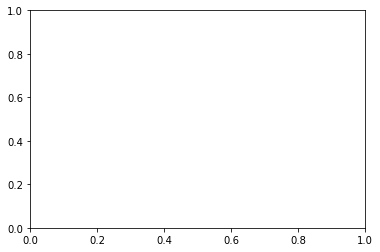

In [32]:
# create fig object as a container, ax is the part of the page that holds data
fig, ax = plt.subplots()
plt.show()

In [56]:
Alabama_weather.groupby("Date.Month", as_index=False)["Data.Temperature.Avg Temp"].mean()

,Date.Month,Data.Temperature.Avg Temp
0,1,44.2500
1,2,50.7500
2,3,60.3125
3,4,62.8125
4,5,71.6500
5,6,80.7500
6,7,83.5500
7,8,83.1875
8,9,81.8750
9,10,70.7500


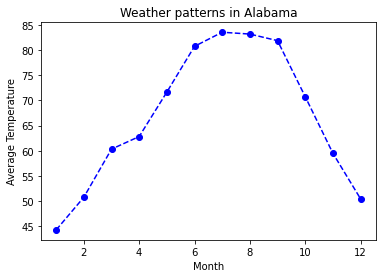

In [63]:

"""
    1. Reference: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
        - if you calculate more than one column of results, your result will be a Dataframe. 
        - For a single column of results, the agg function, by default, will produce a Series.
        - Using the as_index parameter while Grouping data in pandas prevents setting a row index on the result.
    2. using the Object-Oriented Interface: So you will need to add 
        fig, ax = plt.subplots()
        in the same cell!
    3. For each state, there are more than 1 city, so you will need to calculate mean to get one temp one month
        print(Alabama_weather[Alabama_weather["Date.Month"]==1]) # For reference
"""

avd_Alabama_weather = Alabama_weather.groupby("Date.Month", as_index=False)["Data.Temperature.Avg Temp"].mean()

fig, ax = plt.subplots()
ax.plot(avd_Alabama_weather.iloc[:,0], 
        avd_Alabama_weather.iloc[:,1],
        color='b',
        marker='o',
        linestyle='--')
ax.set_xlabel('Month') # Remember this is not equal but brackets!
ax.set_ylabel('Average Temperature')
ax.set_title("Weather patterns in Alabama")
plt.show()

## small multiples
- These are multiple small plots that show similar data across different conditions
- In Matplotplib, small multiples are called sub-plots
    - fig, ax = plt.subplots(3,2)

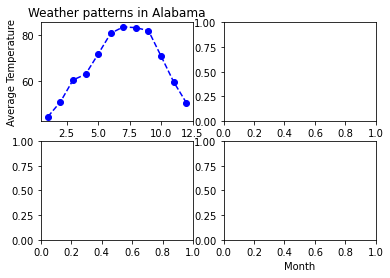

In [68]:
avd_Alabama_weather = Alabama_weather.groupby("Date.Month", as_index=False)["Data.Temperature.Avg Temp"].mean()

fig, ax = plt.subplots(2,2)
ax[0,0].plot(avd_Alabama_weather.iloc[:,0], 
        avd_Alabama_weather.iloc[:,1],
        color='b',
        marker='o',
        linestyle='--')
ax[1,1].set_xlabel('Month') # Remember this is not equal but brackets!
ax[0,0].set_ylabel('Average Temperature')
ax[0,0].set_title("Weather patterns in Alabama")
plt.show()

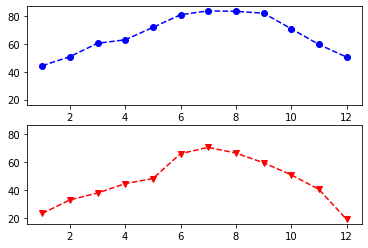

In [70]:
avg_Alabama_weather = Alabama_weather.groupby("Date.Month", as_index=False)["Data.Temperature.Avg Temp"].mean()
avg_Wyoming_weather = Wyoming_weather.groupby("Date.Month", as_index=False)["Data.Temperature.Avg Temp"].mean()

fig, ax = plt.subplots(2,1, sharey = True)
ax[0].plot(avg_Alabama_weather.iloc[:,0], 
        avg_Alabama_weather.iloc[:,1],
        color='b',
        marker='o',
        linestyle='--')

ax[1].plot(avg_Wyoming_weather.iloc[:,0], 
        avg_Wyoming_weather.iloc[:,1],
        color='r',
        marker='v',
        linestyle='--')

plt.show()

## Plotting time-series data
- Data source: https://datahub.io/core/co2-ppm

In [97]:
CO2 = pd.read_csv("co2-mm-mlo_csv.csv", parse_dates=['Date'], index_col ="Date")
print(CO2.head(3))
CO2.shape

            Decimal Date  Average  Interpolated   Trend  Number of Days
Date                                                                   
1958-03-01      1958.208   315.71        315.71  314.62              -1
1958-04-01      1958.292   317.45        317.45  315.29              -1
1958-05-01      1958.375   317.50        317.50  314.71              -1


(727, 5)

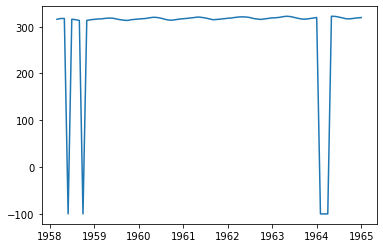

In [102]:
fig, ax = plt.subplots()
last_ten_yrs = CO2["1958-01-01":"1965-01-01"]
ax.plot(last_ten_yrs.index, last_ten_yrs["Average"]) # Here will need to use CO2.index instead!
plt.show()

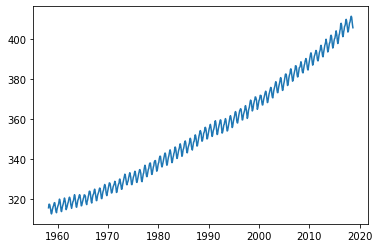

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(CO2.index, CO2["Interpolated"]) # Here will need to use CO2.index instead!
plt.show()

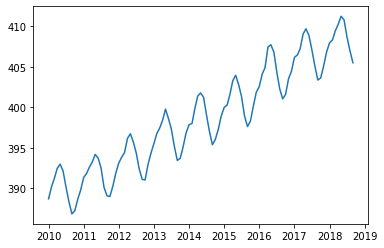

In [100]:
# Use timeindex to zoom in 

fig, ax = plt.subplots()
last_ten_yrs = CO2["2010-01-01":"2020-01-01"]
ax.plot(last_ten_yrs.index, last_ten_yrs["Interpolated"]) # Here will need to use CO2.index instead!
plt.show()


## Plotting time-series with different variables

Data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00502/

In [107]:
retail = pd.read_csv("online_retail.csv", parse_dates=['InvoiceDate'], index_col ="InvoiceDate")

In [108]:
print(retail.head(3))

                    Invoice StockCode                         Description  \
InvoiceDate                                                                 
2010-12-01 08:26:00  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00  536365     71053                 WHITE METAL LANTERN   
2010-12-01 08:26:00  536365    84406B      CREAM CUPID HEARTS COAT HANGER   

                     Quantity  Price  Customer ID         Country  
InvoiceDate                                                        
2010-12-01 08:26:00         6   2.55      17850.0  United Kingdom  
2010-12-01 08:26:00         6   3.39      17850.0  United Kingdom  
2010-12-01 08:26:00         8   2.75      17850.0  United Kingdom  


In [111]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541910 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   Price        541910 non-null  float64
 5   Customer ID  406830 non-null  float64
 6   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [116]:
# For index column how to change datatype!
retail.index= pd.to_datetime(retail.index).date

-- Use weather dataset instead --

In [4]:
weather = pd.read_csv('weather.csv', parse_dates= ["Date.Full"], index_col= ["Date.Full"])

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16743 entries, 2016-01-03 to 2017-01-01
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Month                 16743 non-null  int64  
 2   Date.Week of               16743 non-null  int64  
 3   Date.Year                  16743 non-null  int64  
 4   Station.City               16743 non-null  object 
 5   Station.Code               16743 non-null  object 
 6   Station.Location           16743 non-null  object 
 7   Station.State              16743 non-null  object 
 8   Data.Temperature.Avg Temp  16743 non-null  int64  
 9   Data.Temperature.Max Temp  16743 non-null  int64  
 10  Data.Temperature.Min Temp  16743 non-null  int64  
 11  Data.Wind.Direction        16743 non-null  int64  
 12  Data.Wind.Speed            16743 non-null  float64
dtypes: float64(2), int64(7), obje

In [126]:
# Original set
Alabama_weather = weather[(weather["Station.State"]=="Alabama") & (weather["Date.Year"].isin([2016]))]
avg_Alabama_weather = Alabama_weather.groupby(["Date.Month","Date.Year"], as_index=False)[["Data.Temperature.Avg Temp","Data.Wind.Speed"]].mean()
avg_Alabama_weather["year_month"] = pd.to_datetime(avg_Alabama_weather["Date.Year"].map(str) +'-'+ avg_Alabama_weather["Date.Month"].map(str))

In [124]:
"""
1. Reference: https://stackoverflow.com/questions/38542419/could-pandas-use-column-as-index
2. If inplace=True is not provided, set_index returns the modified dataframe as a result.
"""
avg_Alabama_weather.set_index("year_month", inplace= True)
print(avg_Alabama_weather)

            Date.Month  Date.Year  Data.Temperature.Avg Temp  Data.Wind.Speed
year_month                                                                   
2016-01-01           1       2016                   5.260328         5.925500
2016-02-01           2       2016                   5.983310         7.057500
2016-03-01           3       2016                   6.610282         6.598750
2016-04-01           4       2016                   3.868139         5.860625
2016-05-01           5       2016                   3.801316         4.645500
2016-06-01           6       2016                   1.843909         3.470625
2016-07-01           7       2016                   1.503505         3.310000
2016-08-01           8       2016                   1.327592         3.477500
2016-09-01           9       2016                   1.024695         3.516250
2016-10-01          10       2016                   2.291288         4.026000
2016-11-01          11       2016                   6.377042    

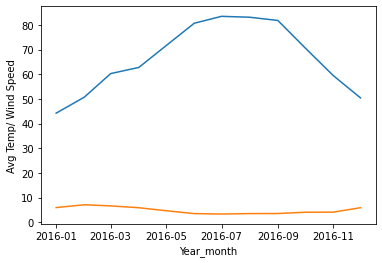

In [37]:
fig, ax = plt.subplots()

ax.plot(avg_Alabama_weather.index, avg_Alabama_weather["Data.Temperature.Avg Temp"])
ax.plot(avg_Alabama_weather.index, avg_Alabama_weather["Data.Wind.Speed"])
ax.set_xlabel("Year_month")
ax.set_ylabel('Avg Temp/ Wind Speed')
plt.show()

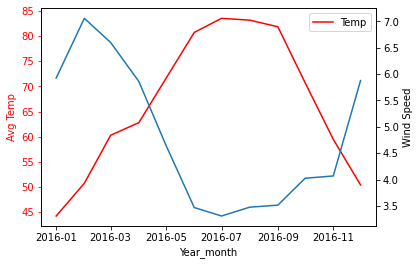

In [46]:
# The scale for two lines are different!

fig, ax = plt.subplots()

ax.plot(avg_Alabama_weather.index, avg_Alabama_weather["Data.Temperature.Avg Temp"], color='r')
ax.set_xlabel("Year_month")
ax.set_ylabel('Avg Temp',color='r')
ax.tick_params('y', colors='red')

ax2=ax.twinx()
ax2.plot(avg_Alabama_weather.index, avg_Alabama_weather["Data.Wind.Speed"])
ax2.set_ylabel('Wind Speed')
ax.legend(["Temp"])
plt.show()

In [51]:
# A function that plots time seires

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x,y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

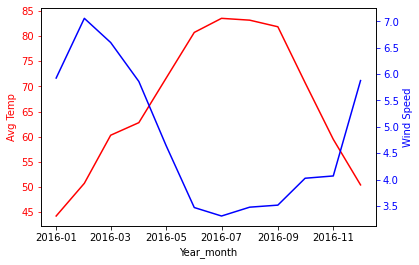

In [55]:
# Use the function 

fig, ax = plt.subplots()
plot_timeseries(ax, avg_Alabama_weather.index, avg_Alabama_weather["Data.Temperature.Avg Temp"], 'red', 'Year_month','Avg Temp')

ax2= ax.twinx()
plot_timeseries(ax2, avg_Alabama_weather.index, avg_Alabama_weather["Data.Wind.Speed"], 'blue', 'Year_month','Wind Speed')
plt.show()

## Annotating time-series data

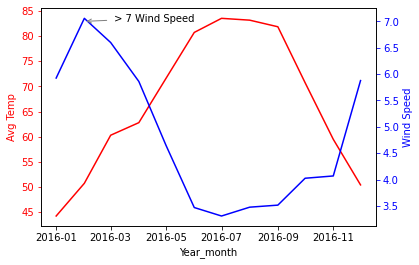

In [68]:
fig, ax = plt.subplots()
plot_timeseries(ax, avg_Alabama_weather.index, avg_Alabama_weather["Data.Temperature.Avg Temp"], 'red', 'Year_month','Avg Temp')

ax2= ax.twinx()
plot_timeseries(ax2, avg_Alabama_weather.index, avg_Alabama_weather["Data.Wind.Speed"], 'blue', 'Year_month','Wind Speed')

ax2.annotate(" > 7 Wind Speed", 
             xy =(pd.Timestamp("2016-02-01"),7), # Define the position of annotate
            xytext=(pd.Timestamp('2016-03-01'),7), # Define the text position of annotate
            arrowprops={"arrowstyle": "->", "color":"gray"})
plt.show()

In [ ]:
## https://projects.datacamp.com/projects/20
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x = 'year', y = 'proportion_deaths', label ='clinic_1')
clinic_2.plot(x = 'year', y = 'proportion_deaths', label ='clinic_2', ax=ax, ylabel = 'proportion_deaths')

## Quantitative comparisons: bar-charts
- Data source: https://worldpopulationreview.com/country-rankings/olympic-medals-by-country

In [6]:
OP_game = pd.read_csv("Olympic Medals By Country 2021.csv", index_col = 0)
op_sample = OP_game.iloc[0:15]

In [7]:
print(op_sample.head(2))

                goldOlympicMedals  silverOlympicMedals  bronzeOlympicMedials  \
country                                                                        
United States                1127                  907                   793   
United Kingdom                274                  299                   310   

                totalOlympicMedals     pop2021  
country                                         
United States                 2827  332915.073  
United Kingdom                 883   68207.116  


<ipython-input-8-f468bf614c1c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(op_sample.index, rotation=90)


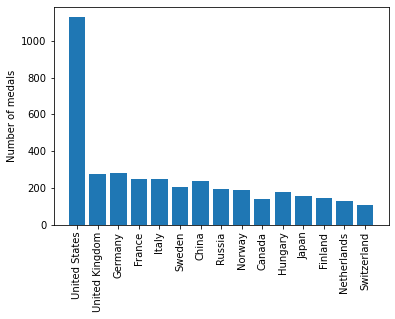

In [8]:
fig, ax = plt.subplots()
ax.bar(op_sample.index, op_sample['goldOlympicMedals'])
ax.set_xticklabels(op_sample.index, rotation=90)
ax.set_ylabel("Number of medals")
plt.show()

<ipython-input-9-cc074812193f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(op_sample.index, rotation=90)


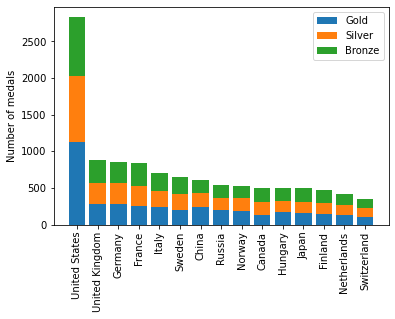

In [9]:
# Stack bar chart!
fig, ax = plt.subplots()
ax.bar(op_sample.index, op_sample['goldOlympicMedals'], label ="Gold")
ax.bar(op_sample.index, op_sample['silverOlympicMedals'], 
       bottom =op_sample['goldOlympicMedals'],
      label ="Silver")
ax.bar(op_sample.index, op_sample['bronzeOlympicMedials'], 
       bottom =op_sample['goldOlympicMedals'] + op_sample['silverOlympicMedals'],
      label ="Bronze")
ax.set_xticklabels(op_sample.index, rotation=90)
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

## Quantitative comparisons: histogram
- Data source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [35]:
athlete = pd.read_csv("athlete_events.csv")
print(athlete.head(2))

   ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal  
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  


In [11]:
## Create sample datasets
men_Basketball = athlete[athlete['Event']=="Basketball Men's Basketball"]
men_Judo = athlete[athlete['Event']=="Judo Men's Extra-Lightweight"]

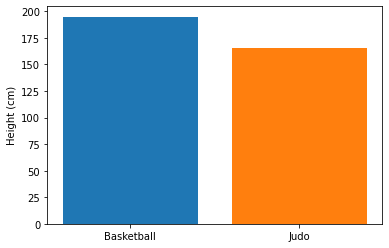

In [4]:
fix, ax = plt.subplots()
ax.bar("Basketball", men_Basketball['Height'].mean())
ax.bar("Judo", men_Judo['Height'].mean())
ax.set_ylabel("Height (cm)")
plt.show()

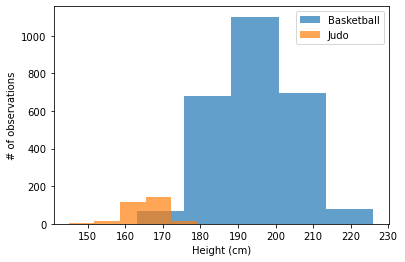

In [117]:
fix, ax = plt.subplots()
ax.hist(men_Basketball['Height'], label = "Basketball", bins =5, alpha= 0.7)
ax.hist(men_Judo['Height'], label = "Judo", bins =5, alpha= 0.7)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend() # Need to add the label first!|
plt.show()

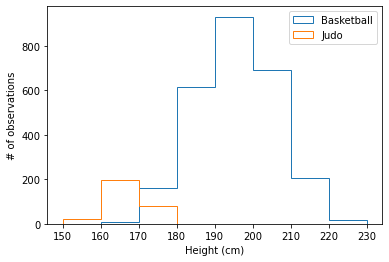

In [120]:
# Line type of histogram
fix, ax = plt.subplots()
ax.hist(men_Basketball['Height'], 
        label = "Basketball", 
        bins =[150, 160,170,180,190,200, 210,220,230],
        histtype="step")

ax.hist(men_Judo['Height'], 
        label = "Judo", 
        bins =[150, 160,170,180,190,200, 210,220,230],
        histtype="step")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend() # Need to add the label first!|
plt.show()

## statistical plotting

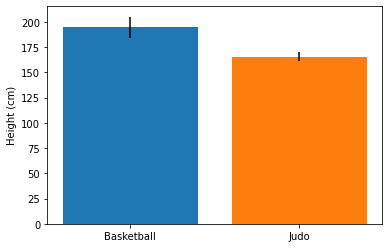

In [122]:
## Adding error bars to bar charts

fix, ax = plt.subplots()

ax.bar("Basketball", 
       men_Basketball['Height'].mean(),
       yerr = men_Basketball['Height'].std())

ax.bar("Judo", 
       men_Judo['Height'].mean(),
       yerr = men_Judo['Height'].std())

ax.set_ylabel("Height (cm)")
plt.show()

In [ ]:
## Need to add std for adding error bar to line chart!
"""
Qestion: if we want to do summary stats on the same column, how to rename to differentiate?
"""

Alabama_weather = weather[(weather["Station.State"]=="Alabama") & (weather["Date.Year"].isin([2016]))]
avg_Alabama_weather = Alabama_weather.groupby(["Date.Month","Date.Year"], as_index=False).agg(
    {
        "Data.Temperature.Avg Temp":"mean",
        "Data.Wind.Speed":"mean",
        "Data.Temperature.Avg Temp":"std"
    }
)
avg_Alabama_weather.rename(columns={
    "mean": "mean_duration",
    "std": "std_duration"
})

avg_Alabama_weather["year_month"] = pd.to_datetime(avg_Alabama_weather["Date.Year"].map(str) +'-'+ avg_Alabama_weather["Date.Month"].map(str))

In [ ]:
fig, ax = plt.subplots()

ax.errorbar(avg_Alabama_weather.index, 
            avg_Alabama_weather["Data.Temperature.Avg Temp"],
            yerr= avg_Alabama_weather["STD Column"])

ax.plot(avg_Alabama_weather.index, 
        avg_Alabama_weather["Data.Wind.Speed"],
        yerr= avg_Alabama_weather["STD COlumn"])

ax.set_xlabel("Year_month")
ax.set_ylabel('Avg Temp/ Wind Speed')
plt.show()

## Adding boxplot

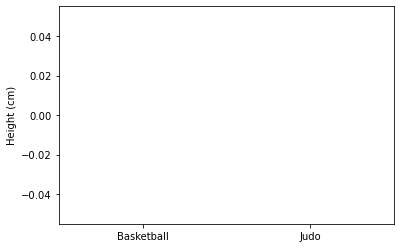

In [30]:
## Why the chart is empty?
## It doesn't display the box figure within the columns having NaN values.
fig, ax = plt.subplots()
ax.boxplot([men_Basketball['Height'],men_Judo['Height']])
ax.set_xticklabels(["Basketball","Judo"])
ax.set_ylabel("Height (cm)")

plt.show()

In [39]:
## Drop NaN rows first, then generate the subset!
#### Reference: https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe
filtered_data = athlete.dropna()

## Create sample datasets
men_Basketball = filtered_data[filtered_data['Event']=="Basketball Men's Basketball"]
men_Judo = filtered_data[filtered_data['Event']=="Judo Men's Extra-Lightweight"]

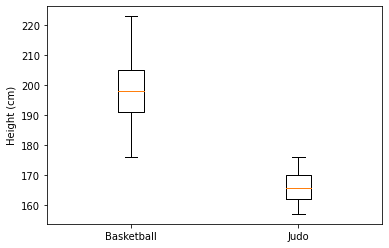

In [43]:

fig, ax = plt.subplots()
ax.boxplot([men_Basketball['Height'],men_Judo['Height']])
ax.set_xticklabels(["Basketball","Judo"])
ax.set_ylabel("Height (cm)")

plt.show()

## Quantitative comparisons: Scatter plot